In [135]:
import numpy as np
import pandas as pd
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import pandas as pd
from glob import glob

In [3]:
crime_raw_data = pd.read_csv("../data/2016_seoul_crime.csv", encoding="euc-kr")
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [4]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [5]:
crime_raw_data["죄종"].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

In [6]:
crime_raw_data[crime_raw_data["죄종"].isnull()]

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [7]:
crime_raw_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [8]:
crime_raw_data = crime_raw_data[crime_raw_data["죄종"].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


In [9]:
crime_raw_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
...,...,...,...,...
305,수서,강간,검거,144.0
306,수서,절도,발생,1149.0
307,수서,절도,검거,789.0
308,수서,폭력,발생,1666.0


In [10]:
crime_station = crime_raw_data.pivot_table(index="구분", columns=["죄종", "발생검거"], aggfunc=np.sum)
crime_station.head()

/tmp/ipykernel_3809/1784021566.py:1: FutureWarning: The provided callable <function sum at 0x7f90d81b1240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(index="구분", columns=["죄종", "발생검거"], aggfunc=np.sum)


건수                                                              
죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [11]:
crime_station.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [12]:
crime_station.columns = crime_station.columns.droplevel([0])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [13]:
crime_station["강도", "검거"].head()

구분
강남    26.0
강동    13.0
강북     4.0
강서    10.0
관악    10.0
Name: (강도, 검거), dtype: float64

In [14]:
crime_station["살인", "발생"].head()

구분
강남    3.0
강동    4.0
강북    7.0
강서    9.0
관악    6.0
Name: (살인, 발생), dtype: float64

In [15]:
crime_station.loc["강남", ("강도", "발생")]

24.0

In [16]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [17]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [18]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [19]:
crime_station.rename(columns={"강간검거": "성범죄검거", "강간발생": "성범죄발생"}, inplace=True)

In [20]:
crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성범죄검거   31 non-null     float64
 1   성범죄발생   31 non-null     float64
 2   강도검거    31 non-null     float64
 3   강도발생    31 non-null     float64
 4   살인검거    31 non-null     float64
 5   살인발생    31 non-null     float64
 6   절도검거    31 non-null     float64
 7   절도발생    31 non-null     float64
 8   폭력검거    31 non-null     float64
 9   폭력발생    31 non-null     float64
dtypes: float64(10)
memory usage: 3.7+ KB


In [21]:
crime_station.head()

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [22]:
real_gu = {'종로구': ['종로', '혜화'], '중구': ['남대문', '중부'],
           '용산구': ['용산'], '성동구': ['성동'],
           '광진구': ['광진'], '동대문구': ['동대문'],
           '중랑구': ['중랑'], '성북구': ['성북', '종암'],
           '강북구': ['강북'], '도봉구': ['도봉'],
           '노원구': ['노원'], '은평구': ['서부', '은평'],
           '서대문구': ['서대문'], '마포구': ['마포'],
           '양천구': ['양천'], '강서구': ['강서'],
           '구로구': ['구로'], '금천구': ['금천'],
           '영등포구': ['영등포'], '동작구': ['동작'],
           '관악구': ['관악'], '서초구': ['방배', '서초'],
           '강남구': ['강남', '수서'], '송파구': ['송파'],
           '강동구': ['강동']}

In [23]:
real_gu.items()

dict_items([('종로구', ['종로', '혜화']), ('중구', ['남대문', '중부']), ('용산구', ['용산']), ('성동구', ['성동']), ('광진구', ['광진']), ('동대문구', ['동대문']), ('중랑구', ['중랑']), ('성북구', ['성북', '종암']), ('강북구', ['강북']), ('도봉구', ['도봉']), ('노원구', ['노원']), ('은평구', ['서부', '은평']), ('서대문구', ['서대문']), ('마포구', ['마포']), ('양천구', ['양천']), ('강서구', ['강서']), ('구로구', ['구로']), ('금천구', ['금천']), ('영등포구', ['영등포']), ('동작구', ['동작']), ('관악구', ['관악']), ('서초구', ['방배', '서초']), ('강남구', ['강남', '수서']), ('송파구', ['송파']), ('강동구', ['강동'])])

In [24]:
real_gu["서초구"]

['방배', '서초']

In [25]:
real_gu["강남구"]

['강남', '수서']

In [26]:
for gu_name, station_name in real_gu.items():
    if "강남" in station_name:
        print(gu_name)

강남구


In [27]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

In [28]:
tmp_gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [29]:
crime_station['구'] = tmp_gu
crime_station.head()

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구


In [30]:
crime_gu = crime_station.pivot_table(index="구", aggfunc=np.sum)
crime_gu.head()

/tmp/ipykernel_3809/397152675.py:1: FutureWarning: The provided callable <function sum at 0x7f90d81b1240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_gu = crime_station.pivot_table(index="구", aggfunc=np.sum)


,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0
강동구,13.0,14.0,5.0,4.0,152.0,160.0,902.0,1754.0,2201.0,2530.0
강북구,4.0,5.0,6.0,7.0,159.0,217.0,672.0,1222.0,2482.0,2778.0
강서구,10.0,10.0,10.0,9.0,239.0,275.0,1070.0,1952.0,2768.0,3204.0
관악구,10.0,12.0,7.0,6.0,264.0,322.0,937.0,2103.0,2707.0,3235.0


In [31]:
crime_gu["살인발생"].sort_values(ascending=False).head()

구
영등포구    13.0
강서구      9.0
구로구      9.0
송파구      9.0
중랑구      8.0
Name: 살인발생, dtype: float64

In [32]:
crime_gu["폭력발생"].sort_values(ascending=False).head()

구
강남구     4002.0
영등포구    3593.0
송파구     3289.0
관악구     3235.0
강서구     3204.0
Name: 폭력발생, dtype: float64

In [33]:
crime_gu["강도발생"].sort_values(ascending=False).head()

구
강남구     39.0
영등포구    19.0
송파구     15.0
강동구     14.0
중랑구     14.0
Name: 강도발생, dtype: float64

In [34]:
(crime_gu["절도검거"] / crime_gu["절도발생"])

구
강남구     0.534709
강동구     0.514253
강북구     0.549918
강서구     0.548156
관악구     0.445554
광진구     0.400986
구로구     0.450785
금천구     0.517405
노원구     0.398492
도봉구     0.568129
동대문구    0.552062
동작구     0.451876
마포구     0.371983
서대문구    0.500333
서초구     0.502041
성동구     0.691358
성북구     0.493197
송파구     0.412112
양천구     0.439209
영등포구    0.401538
용산구     0.402283
은평구     0.534214
종로구     0.395876
중구      0.425116
중랑구     0.622117
dtype: float64

In [35]:
arrest_col = ["강도검거", "살인검거", "성범죄검거", "절도검거", "폭력검거"]
occur_col = ["강도발생", "살인발생", "성범죄발생", "절도발생", "폭력발생"]

In [36]:
crime_gu[arrest_col].div(crime_gu[occur_col].values) * 100

,강도검거,살인검거,성범죄검거,절도검거,폭력검거
구,,,,,
강남구,107.692308,100.000000,80.038760,53.470867,88.130935
강동구,92.857143,125.000000,95.000000,51.425314,86.996047
강북구,80.000000,85.714286,73.271889,54.991817,89.344852
강서구,100.000000,111.111111,86.909091,54.815574,86.392010
관악구,83.333333,116.666667,81.987578,44.555397,83.678516
광진구,54.545455,100.000000,83.870968,40.098634,84.071906
구로구,130.000000,100.000000,66.300366,45.078534,84.702908
금천구,100.000000,100.000000,81.714286,51.740506,88.736890
노원구,150.000000,120.000000,89.308176,39.849219,84.419714


In [37]:
arrest_rate = ["성범죄검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_gu[arrest_rate] = crime_gu[arrest_col].div(crime_gu[occur_col].values) * 100

In [38]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,성범죄검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0,107.692308,100.000000,80.038760,53.470867,88.130935
강동구,13.0,14.0,5.0,4.0,152.0,160.0,902.0,1754.0,2201.0,2530.0,92.857143,125.000000,95.000000,51.425314,86.996047
강북구,4.0,5.0,6.0,7.0,159.0,217.0,672.0,1222.0,2482.0,2778.0,80.000000,85.714286,73.271889,54.991817,89.344852
강서구,10.0,10.0,10.0,9.0,239.0,275.0,1070.0,1952.0,2768.0,3204.0,100.000000,111.111111,86.909091,54.815574,86.392010
관악구,10.0,12.0,7.0,6.0,264.0,322.0,937.0,2103.0,2707.0,3235.0,83.333333,116.666667,81.987578,44.555397,83.678516


In [39]:
crime_gu.loc["강남구", "강도검거"], crime_gu.loc["강남구", "강도발생"]

(42.0, 39.0)

In [40]:
(crime_gu.loc["강남구", "강도검거"]) / crime_gu.loc["강남구", "강도발생"] * 100

107.6923076923077

In [41]:
crime_gu[crime_gu[arrest_rate] > 100] = 100
crime_gu.head(3)

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,성범죄검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0,100.000000,100.000000,80.038760,53.470867,88.130935
강동구,13.0,14.0,5.0,4.0,152.0,160.0,902.0,1754.0,2201.0,2530.0,92.857143,100.000000,95.000000,51.425314,86.996047
강북구,4.0,5.0,6.0,7.0,159.0,217.0,672.0,1222.0,2482.0,2778.0,80.000000,85.714286,73.271889,54.991817,89.344852


In [42]:
crime_gu.drop(columns=arrest_col, axis=1, inplace=True)

In [43]:
crime_gu.rename(columns={
    "강도발생": "강도", "살인발생": "살인", "성범죄발생": "성범죄",
    "절도발생": "절도", "폭력발생": "폭력"
}, inplace=True)

In [44]:
crime_gu.head()

,강도,살인,성범죄,절도,폭력,성범죄검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,39.0,5.0,516.0,3587.0,4002.0,100.000000,100.000000,80.038760,53.470867,88.130935
강동구,14.0,4.0,160.0,1754.0,2530.0,92.857143,100.000000,95.000000,51.425314,86.996047
강북구,5.0,7.0,217.0,1222.0,2778.0,80.000000,85.714286,73.271889,54.991817,89.344852
강서구,10.0,9.0,275.0,1952.0,3204.0,100.000000,100.000000,86.909091,54.815574,86.392010
관악구,12.0,6.0,322.0,2103.0,3235.0,83.333333,100.000000,81.987578,44.555397,83.678516


In [45]:
occur_col = ["강도", "살인", "성범죄", "절도", "폭력"]
occur_col

['강도', '살인', '성범죄', '절도', '폭력']

In [46]:
print("정규화 전 강서구 절도 건수:", crime_gu.loc["강서구", "절도"])
print("정규화 후 강서구 절도 건수:", crime_gu.loc["강서구", "절도"] / crime_gu["절도"].max())

정규화 전 강서구 절도 건수: 1952.0
정규화 후 강서구 절도 건수: 0.544187343183719


In [47]:
crime_gu_norm = crime_gu[occur_col] / crime_gu[occur_col].max()
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000
강동구,0.358974,0.307692,0.310078,0.488988,0.632184
강북구,0.128205,0.538462,0.420543,0.340675,0.694153
강서구,0.256410,0.692308,0.532946,0.544187,0.800600
관악구,0.307692,0.461538,0.624031,0.586284,0.808346


In [48]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,성범죄검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.000000,100.000000,80.038760,53.470867,88.130935
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.857143,100.000000,95.000000,51.425314,86.996047
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.000000,85.714286,73.271889,54.991817,89.344852
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.000000,100.000000,86.909091,54.815574,86.392010
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.333333,100.000000,81.987578,44.555397,83.678516


In [49]:
crime_gu_norm[occur_col].loc["강남구"]

강도     1.000000
살인     0.384615
성범죄    1.000000
절도     1.000000
폭력     1.000000
Name: 강남구, dtype: float64

In [50]:
crime_gu_norm[occur_col].loc["강남구"].sum()

4.384615384615385

In [51]:
crime_gu_norm[occur_col].loc["강남구"].sum() / 5

0.876923076923077

In [52]:
crime_gu_norm["범죄"] = np.mean(crime_gu_norm[occur_col], axis=1)
crime_gu_norm["검거"] = np.mean(crime_gu_norm[occur_col], axis=1)

In [53]:
crime_gu_norm["범죄"].sort_values(ascending=False).head()

구
강남구     0.876923
영등포구    0.745508
송파구     0.612240
강서구     0.565290
구로구     0.560174
Name: 범죄, dtype: float64

In [54]:
crime_gu_norm["검거"].sort_values(ascending=False).head()

구
강남구     0.876923
영등포구    0.745508
송파구     0.612240
강서구     0.565290
구로구     0.560174
Name: 검거, dtype: float64

In [55]:
crime_gu_norm["검거"].sort_values(ascending=True).head()

구
도봉구     0.239769
성동구     0.270404
성북구     0.349564
서대문구    0.368331
양천구     0.371886
Name: 검거, dtype: float64

In [56]:
crime_gu_norm_sort = crime_gu_norm.sort_values(by="검거", ascending=False)
crime_gu_norm_sort.head()

,강도,살인,성범죄,절도,폭력,성범죄검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.000000,100.000000,80.038760,53.470867,88.130935,0.876923,0.876923
영등포구,0.487179,1.000000,0.689922,0.652635,0.897801,73.684211,100.000000,63.202247,40.153780,83.690509,0.745508,0.745508
송파구,0.384615,0.692308,0.453488,0.708949,0.821839,80.000000,88.888889,78.632479,41.211168,85.375494,0.612240,0.612240
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.000000,100.000000,86.909091,54.815574,86.392010,0.565290,0.565290
구로구,0.256410,0.692308,0.529070,0.532478,0.790605,100.000000,100.000000,66.300366,45.078534,84.702908,0.560174,0.560174


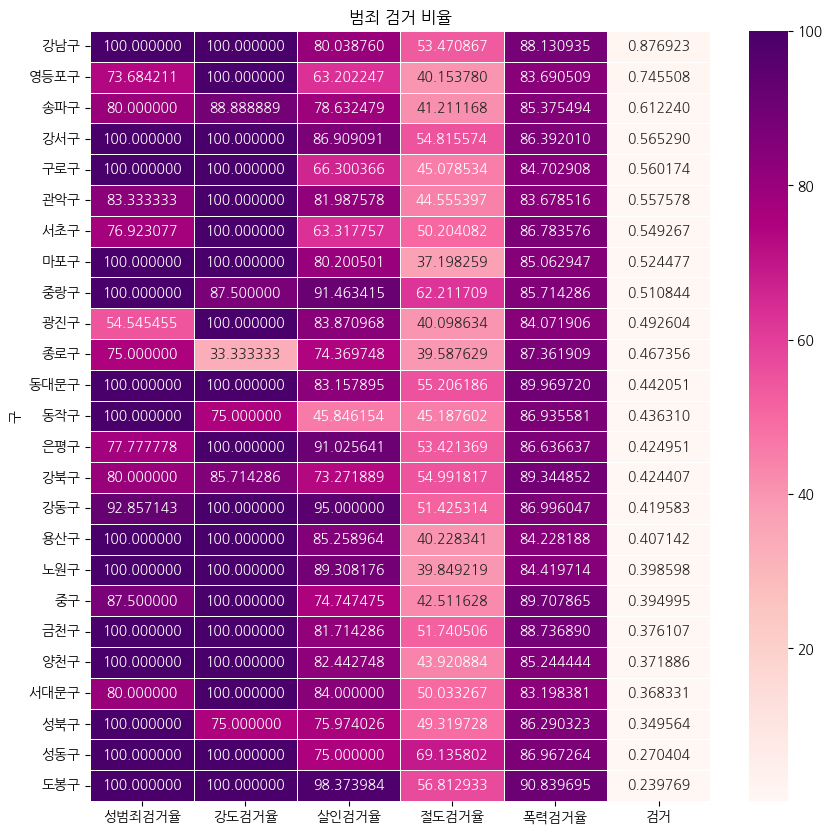

In [57]:
target_col = ["성범죄검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]

plt.figure(figsize=(10, 10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title("범죄 검거 비율")
plt.show();

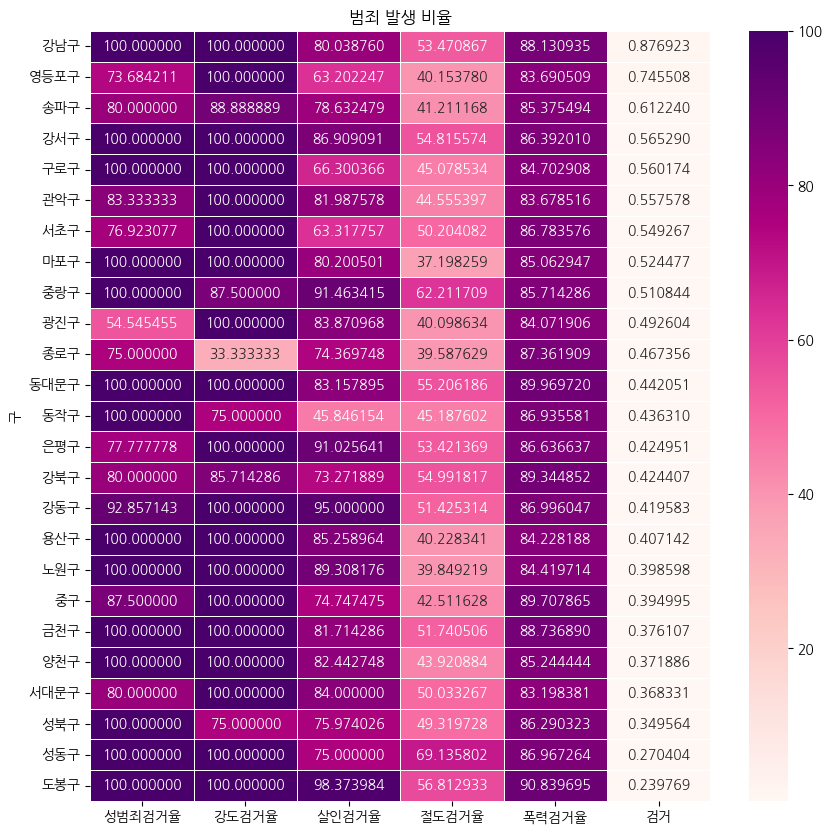

In [58]:
target_col = ["성범죄검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]
crime_gu_norm_sort = crime_gu_norm.sort_values(by="범죄", ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title("범죄 발생 비율")
plt.show();

In [59]:
crime_gu_norm.to_csv("../data/seoul_crime_result.csv", sep=",", encoding="utf-8")